<a href="https://colab.research.google.com/github/chepkemoi93/Evaluating-tradeoffs-in-credit-scoring/blob/main/German_Credit_evaluating_trade_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [ ]:
# Assign column names to the dataset
names = ['Status_of_existing_checking_account', 'Duration_in_month','Credit_history','Purpose','Credit_amount','Savings_account','Present_employment_since','Installment_rate_in_percentage_of_disposable_income','Personal_status_and_sex','Other_debtors','Present_residence_since','Property','Age_in_years','Other_installment_plans','Housing','Number_of_existing_credits_at_this_bank','Job','Number_of_dependents','Telephone','Foreign_worker','Class']

In [ ]:
#Read dataset to pandas dataframe
dataset= pd.read_csv("german.csv", names = names)

In [ ]:
#see what's inside dataset
display(dataset.head())

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_dependents,Telephone,Foreign_worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


**Preprocessing**

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [ ]:
# Convert the dataset to a DataFrame
dataset = pd.DataFrame(dataset)
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# one hot encode cat features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[ 1.,  0.,  0., ..., 67.,  2.,  1.],
       [ 0.,  1.,  0., ..., 22.,  1.,  1.],
       [ 0.,  0.,  0., ..., 49.,  1.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 38.,  1.,  1.],
       [ 1.,  0.,  0., ..., 23.,  1.,  1.],
       [ 0.,  1.,  0., ..., 27.,  1.,  1.]])

In [ ]:
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

**Train- Test- Split**

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(700, 61)
(100, 61)
(200, 61)
(700,)
(100,)
(200,)


In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_val))
print(Counter(y_test))

Counter({np.int64(0): 485, np.int64(1): 215})
Counter({np.int64(0): 74, np.int64(1): 26})
Counter({np.int64(0): 141, np.int64(1): 59})


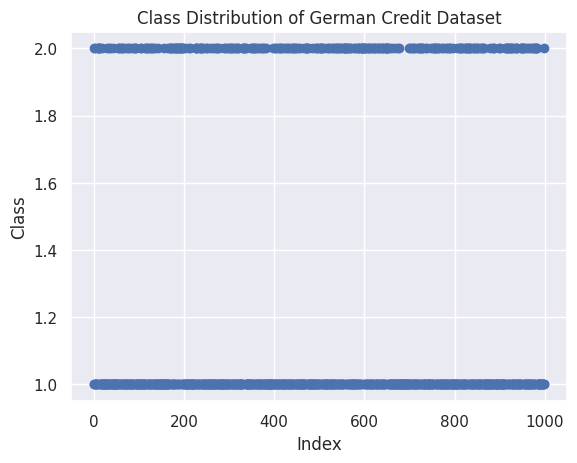

In [ ]:
# Assuming 'class' is the column containing class labels
plt.scatter(dataset.index, dataset['Class'])
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Class Distribution of German Credit Dataset')
plt.show()

In [ ]:
# Create a RobustScaler object
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Fit the scaler to the data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train

array([[ 1.        ,  0.        ,  0.        , ..., -0.26666667,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.86666667,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.33333333,
         2.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.4       ,
         1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.6       ,
         1.        ,  0.        ]])

***Baseline Models ***

In [ ]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(C=0.0001, max_iter=1000, penalty=None, solver='newton-cg'),
    "MLP Classifier": MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive'),
    "Support Vector Machine": SVC(C=100, gamma=0.01,probability=True),
    "Random Forest": RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
                       n_estimators=150)
}


In [ ]:

# Train and evaluate models
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score, roc_auc_score # Import necessary metrics


thresholds = np.linspace(0, 1, 101)
results = {}
best_thresholds = {}
summary = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_probs = model.predict_proba(X_val)[:, 1]

    fpr_list, fnr_list = [], []
    min_diff = float('inf')
    best_t = 0.5

    for t in thresholds:
        y_pred = (y_val_probs >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        fpr_list.append(fpr)
        fnr_list.append(fnr)
        if abs(fpr - fnr) < min_diff:
            min_diff = abs(fpr - fnr)
            best_t = t

    results[name] = (fpr_list, fnr_list)
    best_thresholds[name] = best_t

    # Evaluate on test set
    y_test_probs = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_probs >= best_t).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    f2 = fbeta_score(y_test, y_test_pred, beta=2)
    auc = roc_auc_score(y_test, y_test_probs)

    summary[name] = {
        "Threshold": round(best_t, 2),
        "FPR": round(fpr, 3),
        "FNR": round(fnr, 3),
        "Accuracy": round(acc, 3),
        "F1-Score": round(f1, 3),
        "F2-Score": round(f2, 3),
        "ROC-AUC": round(auc, 3)
    }

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


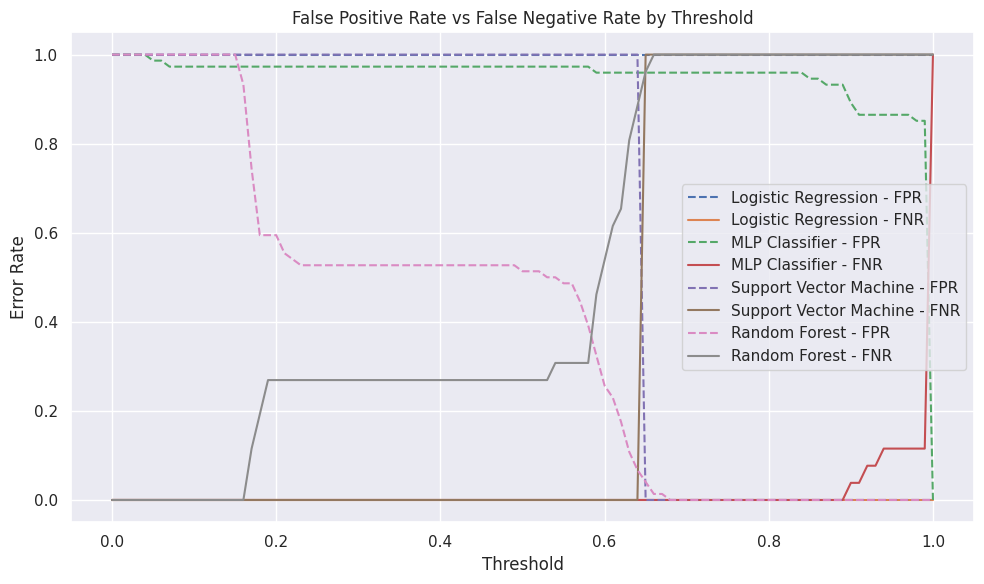

In [ ]:
plt.figure(figsize=(10, 6))
for name, (fpr_list, fnr_list) in results.items():
    plt.plot(thresholds, fpr_list, '--', label=f'{name} - FPR')
    plt.plot(thresholds, fnr_list, label=f'{name} - FNR')

plt.title('False Positive Rate vs False Negative Rate by Threshold')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(summary).T


,Threshold,FPR,FNR,Accuracy,F1-Score,F2-Score,ROC-AUC
Logistic Regression,0.00,1.000,0.000,0.295,0.456,0.677,0.813
MLP Classifier,0.98,0.071,0.695,0.745,0.414,0.341,0.741
Support Vector Machine,0.00,1.000,0.000,0.295,0.456,0.677,0.814
Random Forest,0.58,0.007,0.864,0.740,0.235,0.163,0.811


**Experiment Two**

In [ ]:
# Apply SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply NearMiss (undersampling majority class)
nearmiss = NearMiss()
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# Convert y_train to a Pandas Series before calling value_counts()
print("Original class distribution:", pd.Series(y_train).value_counts().to_dict())
print("SMOTE class distribution:   ", pd.Series(y_train_smote).value_counts().to_dict())
print("NearMiss class distribution:", pd.Series(y_train_nm).value_counts().to_dict())


Original class distribution: {0: 485, 1: 215}
SMOTE class distribution:    {1: 485, 0: 485}
NearMiss class distribution: {0: 215, 1: 215}


In [ ]:
def train_and_evaluate_balanced(X_train_resampled, y_train_resampled, label):
    temp_summary = {}

    for name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)
        y_val_probs = model.predict_proba(X_val)[:, 1]
        y_val_pred = (y_val_probs >= 0.5).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        temp_summary[f"{name} ({label})"] = {
            "FPR": round(fpr, 3),
            "FNR": round(fnr, 3),
            "Accuracy": round(accuracy_score(y_val, y_val_pred), 3),
            "F1-Score": round(f1_score(y_val, y_val_pred), 3),
            "F2-Score": round(fbeta_score(y_val, y_val_pred, beta=2), 3),
            "ROC-AUC": round(roc_auc_score(y_val, y_val_probs), 3)
        }

    return temp_summary

In [ ]:
summary_smote = train_and_evaluate_balanced(X_train_smote, y_train_smote, "SMOTE")
summary_nm = train_and_evaluate_balanced(X_train_nm, y_train_nm, "NearMiss")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
summary_balanced = {**summary_smote, **summary_nm}
pd.DataFrame(summary_balanced).T

,FPR,FNR,Accuracy,F1-Score,F2-Score,ROC-AUC
Logistic Regression (SMOTE),1.000,0.000,0.26,0.413,0.637,0.500
MLP Classifier (SMOTE),1.000,0.000,0.26,0.413,0.637,0.588
Support Vector Machine (SMOTE),0.000,1.000,0.74,0.000,0.000,0.500
Random Forest (SMOTE),0.446,0.308,0.59,0.468,0.581,0.633
Logistic Regression (NearMiss),1.000,0.000,0.26,0.413,0.637,0.500
MLP Classifier (NearMiss),1.000,0.000,0.26,0.413,0.637,0.576
Support Vector Machine (NearMiss),1.000,0.000,0.26,0.413,0.637,0.500
Random Forest (NearMiss),1.000,0.000,0.26,0.413,0.637,0.638


**Experiment Three**

In [ ]:
# Create a RobustScaler object
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Get the column names from the ColumnTransformer
column_names = ct.get_feature_names_out()

# Transform the data and convert back to pandas DataFrames/Series
X_train = pd.DataFrame(scaler.transform(X_train), columns=column_names)
X_valid = pd.DataFrame(scaler.transform(X_val), columns=column_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=column_names)

# y variables are already Series, no need to convert back
X_train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,o__Status_of_existing_checking_account_A11,o__Status_of_existing_checking_account_A12,o__Status_of_existing_checking_account_A13,o__Status_of_existing_checking_account_A14,o__Credit_history_A30,o__Credit_history_A31,o__Credit_history_A32,o__Credit_history_A33,o__Credit_history_A34,o__Purpose_A40,...,o__Telephone_A192,o__Foreign_worker_A201,o__Foreign_worker_A202,remainder__Duration_in_month,remainder__Credit_amount,remainder__Installment_rate_in_percentage_of_disposable_income,remainder__Present_residence_since,remainder__Age_in_years,remainder__Number_of_existing_credits_at_this_bank,remainder__Number_of_dependents
0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.44,1.570538,0.5,0.0,-0.266667,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-0.24,-0.287519,0.5,0.5,2.000000,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.72,-0.359183,-1.0,0.5,-0.866667,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.96,0.512896,-0.5,-1.0,-0.733333,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,-0.96,-0.335295,-1.0,-1.0,-0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.20,0.668340,-1.0,0.5,-0.666667,1.0,0.0
696,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.48,0.609140,0.0,0.5,-0.666667,1.0,1.0
697,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,-0.48,-0.488662,0.5,-0.5,-0.333333,2.0,0.0
698,0.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.44,0.090878,0.5,-0.5,-0.400000,1.0,0.0


In [ ]:
# Example: Let's say Random Forest (SMOTE) and random forest were selected
best_models = {
    "Random Forest": RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
                       n_estimators=150),
    "Random Forest (SMOTE)": RandomForestClassifier()}


# Merge train + validation
# Since X_train and X_val are now DataFrames after scaling and conversion, concat will work.
X_train_full = pd.concat([X_train, X_valid])

# Convert y_train and y_val to pandas Series before concatenating
y_train_full = pd.concat([pd.Series(y_train), pd.Series(y_val)])

In [ ]:
# Train the models
trained_best_models = { "Random Forest": RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
                       n_estimators=150),
    "Random Forest (SMOTE)": RandomForestClassifier()}
for name, model in best_models.items():
    model.fit(X_train_full, y_train_full)
    trained_best_models[name] = model

In [ ]:
thresholds = np.linspace(0, 1, 101)
threshold_results = {}

for name, model in trained_best_models.items():
    y_test_probs = model.predict_proba(X_test)[:, 1]

    best_threshold = 0.5
    best_diff = float('inf')
    best_metrics = {}

    for t in thresholds:
        y_pred = (y_test_probs >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        diff = abs(fpr - fnr)

        if diff < best_diff:
            best_diff = diff
            best_threshold = t
            best_metrics = {
                "Threshold": round(t, 2),
                "FPR": round(fpr, 3),
                "FNR": round(fnr, 3),
                "Accuracy": round(accuracy_score(y_test, y_pred), 3),
                "F1-Score": round(f1_score(y_test, y_pred), 3),
                "F2-Score": round(fbeta_score(y_test, y_pred, beta=2), 3),
                "ROC-AUC": round(roc_auc_score(y_test, y_test_probs), 3)
            }

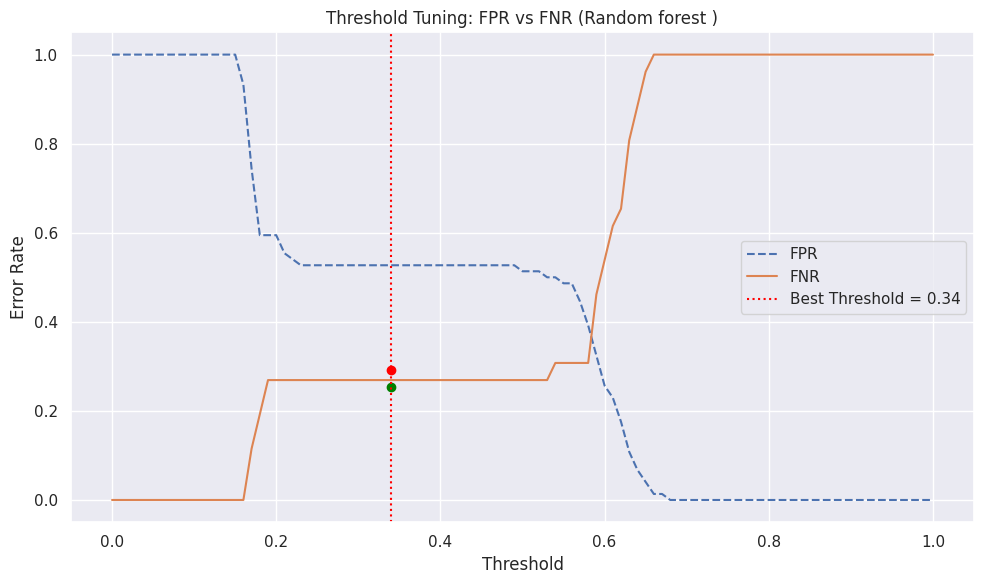

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fpr_list, label="FPR", linestyle='--')
plt.plot(thresholds, fnr_list, label="FNR")

# Mark the optimal threshold
plt.axvline(best_threshold, color='red', linestyle=':', label=f'Best Threshold = {best_threshold:.2f}')
plt.scatter([best_threshold], [best_metrics['FPR']], color='red')
plt.scatter([best_threshold], [best_metrics['FNR']], color='green')

plt.title("Threshold Tuning: FPR vs FNR (Random forest )")
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("📊 Best Threshold Metrics for random forest :")
for metric, value in best_metrics.items():
    print(f"{metric}: {value}")

📊 Best Threshold Metrics for random forest :
Threshold: 0.34
FPR: 0.291
FNR: 0.254
Accuracy: 0.72
F1-Score: 0.611
F2-Score: 0.685
ROC-AUC: 0.807


Here are the architectures of the models you are using:

### Logistic Regression

Logistic Regression is a linear model for binary classification. It models the probability that a given input belongs to a particular class.

**Architecture:**

*   **Input Layer:** Represents the features of your data.
*   **Linear Model:** A weighted sum of the input features plus a bias term.
*   **Sigmoid Function:** The result of the linear model is passed through a sigmoid function, which squashes the output to a value between 0 and 1, representing the probability.
*   **Output Layer:** A single output representing the probability of belonging to the positive class.

### MLP Classifier (Multi-layer Perceptron)

An MLP Classifier is a type of artificial neural network. It consists of multiple layers of interconnected nodes (neurons).

**Architecture:**

*   **Input Layer:** Represents the features of your data.
*   **Hidden Layers:** One or more layers of neurons between the input and output layers. Each neuron in a hidden layer takes the weighted sum of the outputs from the previous layer, adds a bias, and applies an activation function (in your case, the tanh function).
*   **Output Layer:** The final layer of neurons that produces the model's output (in your case, for binary classification, it typically has one or two neurons with a sigmoid or softmax activation function to output probabilities).

### Support Vector Machine (SVC)

Support Vector Machines work by finding the hyperplane that best separates the data points of different classes in a high-dimensional space. The kernel function (in your case, the radial basis function) is used to implicitly map the data into this high-dimensional space.

**Architecture:**

*   **Input Layer:** Represents the features of your data.
*   **Kernel Function:** Transforms the input data into a higher-dimensional space.
*   **Hyperplane:** The model finds the optimal hyperplane in the transformed space that maximizes the margin between the different classes.
*   **Output:** Based on which side of the hyperplane a data point falls, it is assigned to a class.

### Random Forest

A Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Architecture:**

*   **Input Layer:** Represents the features of your data.
*   **Multiple Decision Trees:** The Random Forest consists of many individual decision trees. Each tree is trained on a random subset of the training data and a random subset of the features.
*   **Voting (Classification):** For classification, each tree predicts a class, and the final prediction is the class that receives the most votes from all the trees.
*   **Output:** The final predicted class.

### Logistic Regression Architecture

### MLP Classifier Architecture

### Support Vector Machine (SVC) Architecture

### Random Forest Architecture